<a href="https://colab.research.google.com/github/khushi-joshi-05/Iris-Classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import .csv file**

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('IRIS.csv')

Saving IRIS.csv to IRIS (1).csv


In [4]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Handling Missing Data**

In [ ]:
#counting total null values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(df.shape)
print(df.describe())

(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
df = df.dropna()

In [ ]:
print(df.tail())


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [ ]:
df.drop('Id', axis=1, inplace=True)


**Min-Max Normalization**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Min-max normalization function
def min_max_normalization(df):
    return (df - df.min()) / (df.max() - df.min())

# Apply min-max normalization
normalized_iris_df = min_max_normalization(iris_df)

# Print the normalized DataFrame
print(normalized_iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]


**Data Visualisation**

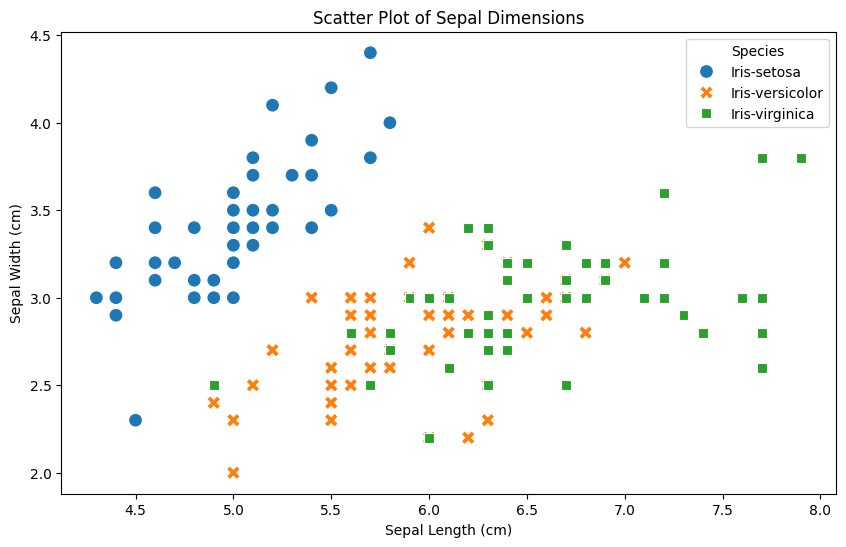

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', s=100)
plt.title('Scatter Plot of Sepal Dimensions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


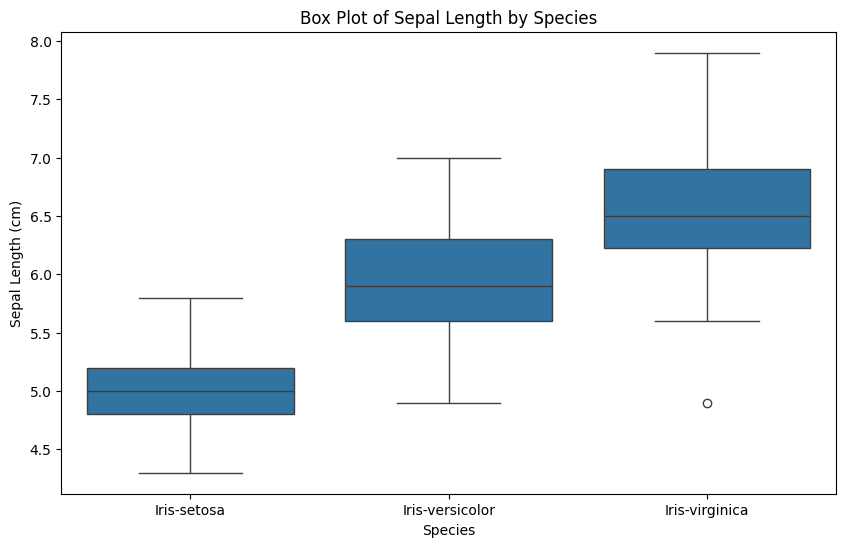

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

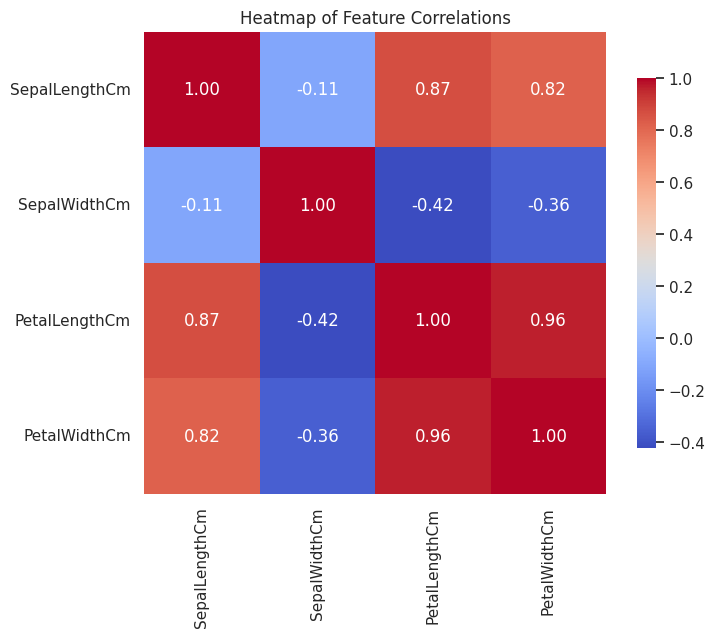

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

if 'df' not in locals():
    raise NameError("DataFrame 'df' is not defined. Please load your data first.")

df_numeric = df.select_dtypes(include=[np.number]).dropna()
correlation_matrix = df_numeric.corr()

sns.set(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Feature Correlations')
plt.show()


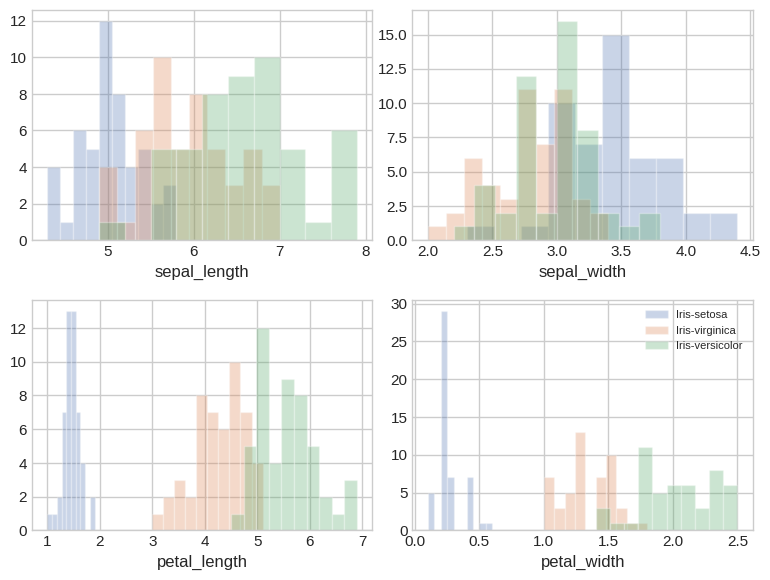

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

label_dict = {0: 'Iris-setosa', 1: 'Iris-virginica', 2: 'Iris-versicolor'}
feature_dict = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        for lab in label_dict.keys():
            plt.hist(X[y == lab, i],
                     label=label_dict[lab],
                     bins=10,
                     alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()


**Dimensionality reduction using PCA and visualisation**

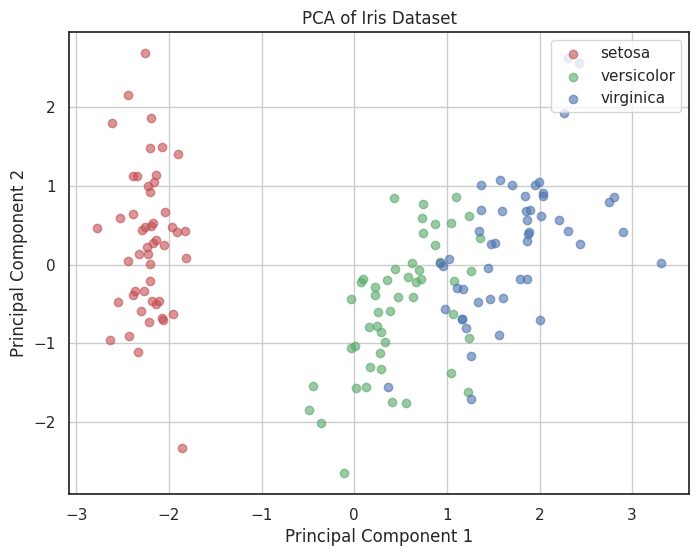

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, target_name in enumerate(target_names):
    plt.scatter(pca_df[pca_df['Target'] == i]['Principal Component 1'],
                pca_df[pca_df['Target'] == i]['Principal Component 2'],
                label=target_name,
                color=colors[i],
                alpha=0.6)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.grid()
plt.show()


**Performance of SVM classifier with and without dimensionality reduction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. SVM without PCA
svm_model = SVC(kernel='linear') # You can change the kernel if needed
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM without PCA: {accuracy_svm}")

# 2. SVM with PCA
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_pca_model = SVC(kernel='linear')
svm_pca_model.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca_model.predict(X_test_pca)
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
print(f"Accuracy of SVM with PCA: {accuracy_svm_pca}")

Accuracy of SVM without PCA: 0.9777777777777777
Accuracy of SVM with PCA: 0.9333333333333333


Implementing Linear regression and visualizing the result

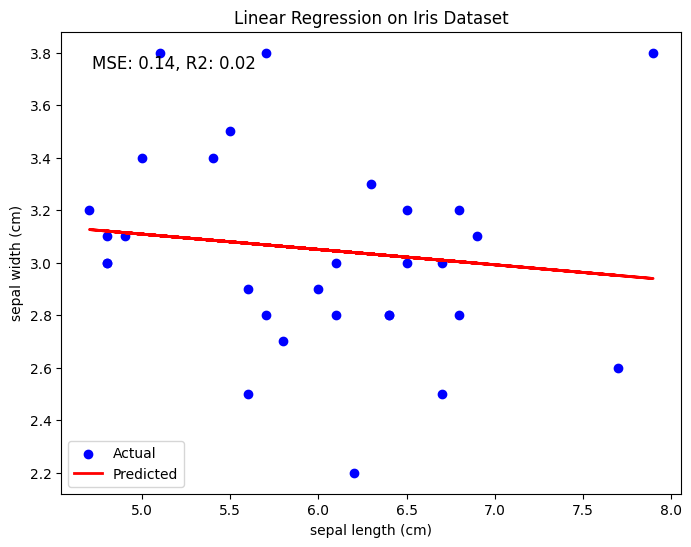

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Function to perform linear regression and visualization
def linear_regression_analysis(df, x_col, y_col, dataset_name):
    """
    Performs linear regression and visualizes the results.

    Args:
        df: pandas DataFrame containing the data.
        x_col: Name of the column to use as the independent variable (feature).
        y_col: Name of the column to use as the dependent variable (target).
        dataset_name: Name of the dataset for visualization purposes.
    """

    X = df[[x_col]]  # Reshape to 2D array
    y = df[y_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title(f'Linear Regression on {dataset_name}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}, R2: {r2:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top')
    plt.show()

# Example usage
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
linear_regression_analysis(iris_df, 'sepal length (cm)', 'sepal width (cm)', 'Iris Dataset')



**ML model implementation**

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1.Train and Evaluate Random forest

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluating Random Forest
print("Random Forest Performance:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions) * 100:.2f}%\n")

Random Forest Performance:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%



Hyper-parameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='accuracy',
                              cv=5)  # 5-fold cross-validation

grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)



Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9583333333333334


In [29]:
import joblib

# ... (Your existing code for training and hyperparameter tuning) ...

# Assuming grid_search_rf is your GridSearchCV object for Random Forest
best_rf_model = grid_search_rf.best_estimator_

# Save the model
joblib.dump(best_rf_model, 'iris_rf_model.pkl')

['iris_rf_model.pkl']

In [31]:
from google.colab import files
files.download('iris_rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. Train and Evaluate Decision Tree

In [9]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluating Decision Tree
print("Decision Tree Performance:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print(f"Accuracy: {accuracy_score(y_test, dt_predictions) * 100:.2f}%\n")


Decision Tree Performance:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%



Hyper-parameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              scoring='accuracy',
                              cv=5)
grid_search_dt.fit(X_train_scaled, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


3. Train and Evaluate Support Vector Machine

In [10]:
# 3. Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluating Support Vector Machine
print("Support Vector Machine Performance:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print(f"Accuracy: {accuracy_score(y_test, svm_predictions) * 100:.2f}%\n")


Support Vector Machine Performance:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%



Hyper-parameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                              param_grid=param_grid_svm,
                              scoring='accuracy',
                              cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 10, 'kernel': 'linear'}


4. Train and Evaluate k-Nearest Neighbors

In [11]:
# 4. k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluating k-Nearest Neighbors
print("k-Nearest Neighbors Performance:")
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))
print(f"Accuracy: {accuracy_score(y_test, knn_predictions) * 100:.2f}%\n")


k-Nearest Neighbors Performance:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%



Hyper-parameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=param_grid_knn,
                              scoring='accuracy',
                              cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
print("Best parameters for k-NN:", grid_search_knn.best_params_)

Best parameters for k-NN: {'n_neighbors': 9, 'weights': 'distance'}


**Hyper-parameter Tuning for Stacked model**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# Assuming you have the best parameters for individual models stored in:
# grid_search_rf.best_params_
# grid_search_dt.best_params_
# grid_search_svm.best_params_
# grid_search_knn.best_params_

# Define base estimators using the best parameters from individual tuning
estimators = [
    ('rf', RandomForestClassifier(random_state=42, **grid_search_rf.best_params_)),
    ('dt', DecisionTreeClassifier(random_state=42, **grid_search_dt.best_params_)),
    ('svm', SVC(random_state=42, **grid_search_svm.best_params_)),
    ('knn', KNeighborsClassifier(**grid_search_knn.best_params_)),
]

# Define the parameter grid for the stacked model
param_grid_stacked = {
    'final_estimator__C': [0.1, 1, 10],  # Tuning for LogisticRegression (final_estimator)
    # Add other hyperparameters of StackingClassifier or final_estimator if needed
}

# Create and fit GridSearchCV for the stacked model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
grid_search_stacked = GridSearchCV(estimator=stacking_model,
                                   param_grid=param_grid_stacked,
                                   scoring='accuracy',
                                   cv=5)
grid_search_stacked.fit(X_train_scaled, y_train)

# Print the best parameters found for the stacked model
print("Best parameters for Stacked Model:", grid_search_stacked.best_params_)

Best parameters for Stacked Model: {'final_estimator__C': 0.1}


**Model Comparison and Selection**

In [18]:
from sklearn.metrics import accuracy_score

# Assuming you have trained and evaluated all models with their best hyperparameters
# and stored them in a dictionary called 'models':

models = {
    "Random Forest": grid_search_rf.best_estimator_,
    "Decision Tree": grid_search_dt.best_estimator_,
    "SVM": grid_search_svm.best_estimator_,
    "k-NN": grid_search_knn.best_estimator_,
    "Stacked Model": grid_search_stacked.best_estimator_,
}

results = {}
for model_name, model in models.items():
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

print("Model Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")

Model Comparison:
Random Forest: Accuracy = 1.00
Decision Tree: Accuracy = 1.00
SVM: Accuracy = 0.97
k-NN: Accuracy = 1.00
Stacked Model: Accuracy = 1.00

Best Model: Random Forest with Accuracy = 1.00


**Cross-Validation**

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_scaled, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.9666666666666668
Standard deviation of cross-validation scores: 0.02108185106778919


**Result**

In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = []
for model_name, model in models.items():

    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    results.append([model_name, accuracy, precision, recall, f1, best_params])

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Best Hyperparameters'])


# Display the result table
print(results_df)

           Model  Accuracy  Precision    Recall  F1-Score  \
0  Random Forest  1.000000   1.000000  1.000000  1.000000   
1  Decision Tree  1.000000   1.000000  1.000000  1.000000   
2            SVM  0.966667   0.969444  0.966667  0.966411   
3           k-NN  1.000000   1.000000  1.000000  1.000000   
4  Stacked Model  1.000000   1.000000  1.000000  1.000000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         